# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [5]:
# read CSV data
df = pd.read_csv('housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [6]:
import seaborn as sns

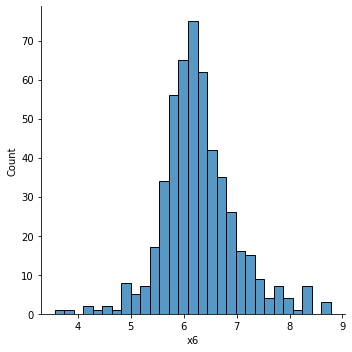

In [7]:
sns.displot(df['x6'])

# 外れ値除去 (3σ法)

In [8]:
col = 'x6'

In [9]:
# 平均 (average)
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [15]:
mean[col]

6.284634387351779

In [17]:
# 標準偏差 (standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [18]:
sigma[col]

0.7026171434153233

In [19]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105809

In [21]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597748

In [29]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [31]:
len(df)

506

In [32]:
len(df2)

498

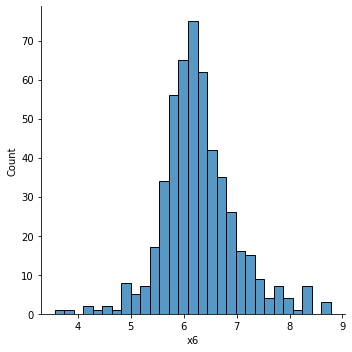

In [35]:
# 分布の確認
sns.displot(df['x6'])

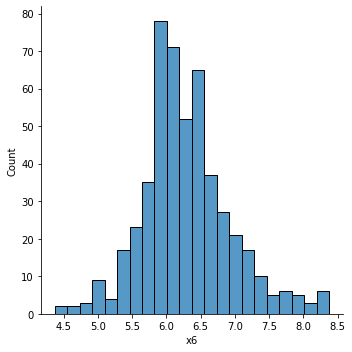

In [36]:
sns.displot(df2['x6'])

In [37]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [43]:
_df = df
for col in cols:
  # 3σ法の上下限値を設定
  low = mean[col] - 3 * sigma[col]
  high = mean[col] + 3 * sigma[col]
  # 条件での絞り込み
  _df = _df[(_df[col] > low) & (_df[col] < high)]
_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [41]:
# original
len(df)

506

In [44]:
# 3σ法適用後
len(_df)

415

外れ値が多い場合の対処法
- 外れ値は取り除く
- 外れ値を平均もしくは中央値で埋める (取り除くとサンプルが減りすぎる場合)
- 主成分分析などを使って、洗剤変数に変換した後に3σ方を適用 <- 高度

# 入力変数と出力変数に分割

In [46]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [48]:
# df.iloc[行, 列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

# 訓練データと検証データに分割

In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
# define model
model = LinearRegression()

In [58]:
# learn model
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# 検証 <- 訓練データ
model.score(X_train, y_train)

0.7972109224535134

In [60]:
# 検証 <- 検証データ
model.score(X_test, y_test)

0.6253776004329582

# 過学習 (オーバーフィッティング)

# スケーリング

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
# declare scaler
scaler = StandardScaler()

In [63]:
# scalerの学習 <- 平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler()

In [67]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [71]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [72]:
model = LinearRegression()
model.fit(X_train2, y_train)

LinearRegression()

In [73]:
# 検証 <- 訓練データ
model.score(X_train2, y_train)

0.7972109224535133

In [74]:
# 検証 <- 検証データ
model.score(X_test2,y_test)

0.6253776004329594

In [75]:
# 重みの確認 (ここが本題)
model.coef_

array([-0.19542642,  0.21154333,  0.50827735,  0.        , -1.21336016,
        3.91986658, -0.36986122, -1.85711554,  1.16625182, -1.52855186,
       -1.8725663 ,  0.24442708, -2.76100147])

In [76]:
np.set_printoptions(precision=3,suppress=True)

In [77]:
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

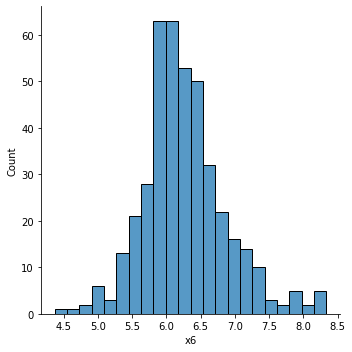

In [78]:
sns.displot(_df['x6'])

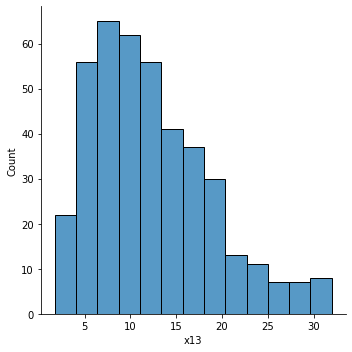

In [81]:
sns.displot(_df['x13'])

In [82]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

<AxesSubplot:>

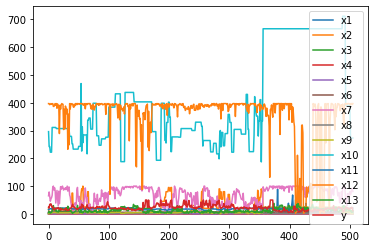

In [83]:
df.plot.line()

In [84]:
df.plot_bokeh.line()

AttributeError: 'DataFrame' object has no attribute 'plot_bokeh'

In [85]:
p = figure()
p.line(df)

GlyphRenderer(id='1037', ...)

In [86]:
show(p)

In [87]:
output_notebook()


Loading BokehJS ...

In [94]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()


Loading BokehJS ...

In [95]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
# グラフ全体の設定を行う
p = figure(plot_width=400,  # 描画するグラフの横幅
           plot_height=400,  # 描画するグラフの縦幅
           title="散布図"  # グラフのタイトル
           )

p.circle(x=x,  # X軸
         y=y,  # Y軸
         size=15,  # グラフに対しての直径値
         line_color="navy",  # 円の線の色
         fill_color="orange",  # 円の色
         fill_alpha=0.5  # 円の透明度
         )

show(p)  # 設定した内容を表示させます。


RuntimeError: Models must be owned by only a single document, Toolbar(id='1026', ...) is already in a doc